# Introduction to Machine Learning (CSCI-UA.473)

### Homework 4
#### Due: November $30^{th}$, 2023 at 11:59PM


#### Name: Gil Halevi
#### Email: gh2354@nyu.edu

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive/')
## Use the same dataset that was released with HW1
data = pd.read_csv('/content/drive/MyDrive/HW1/FML2023_HW1_Dataset.csv')
# Separate the features, target values, and feature names
X = data.drop('target', axis=1)
y = data['target'].values

# Create an imbalanced target variable
y= np.where(y > np.percentile(y, 50), 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mounted at /content/drive/


### Question 1: Nearest Neighbor Classifier (15 points)

**Task 1.1 (10 points)** The k-NN algorithm is relatively simple and is based on the assumption that similar things exist in close proximity.

The steps for the k-NN algorithm are as follows:

- Choose the number of $k$ neighbors
- For each example in the test data, do the following:
  - Calculate the distance between the test data example and each example in the training data. You can use the Euclidean distance for this exercise.
  - Sort the distances in increasing order
  - Select the $k$ nearest training examples that are closest to the test example: corresponding to the first $k$ distances from this sorted list
  - Get the labels of the selected $k$ training examples
  - Return the mode of the $k$ labels
  - The prediction is the most common class among the $k$ nearest neighbors

**Task 1.2 (5 points):** Compare the test accuracy of KNN with $k=[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]$. Plot the accuracy curve with the number of neighbors $k$ on the x-axis and the accuracy on the test set on the y-axis. How does changing this parameter affect the performance of the KNN?


In [2]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.to_numpy()
        self.y_train = y

    def predict(self, X):
        X = X.to_numpy()
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
      neighbors = [(np.linalg.norm(x-pt[0]),pt[1]) for pt in zip(self.X_train, self.y_train)]
      neighbors.sort(key=lambda e:e[0]) # sort them by their first element, which is the distance to that point
      classes={}
      if np.sum(np.array(neighbors)[:self.k])>self.k/2:
        return 1
      else:
        return 0

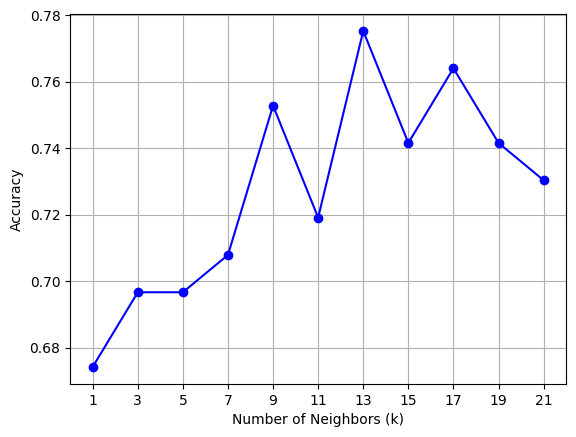

In [6]:
import matplotlib.pyplot as plt
model_accs=[]
k_list = [1,3,5,7,9,11,13,15,17,19,21]
for k in k_list:
  model = KNN(k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = sum(y_pred==y_test)/len(y_pred)
  model_accs.append(acc)
## Add code here
##
plt.plot(k_list, model_accs, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_list)
plt.grid(True)
plt.show()

### Question 2: Decision Trees (20 points)

**Task 2.1 (5 points):** Train a Decision tree classifier and evaluate its performance on the test set. You can use existing python libraries for this question.

**Task 2.2 (10 points):** Visualize the generated decision tree and answer the following questions:
- Identify and describe the decision-making process at the root node. What feature is used to make the first split by the classifier, and what is the threshold value?
- For any two leaf nodes, explain the path (in terms of decisions made) from the root to the leaf.

**Task 2.3 (5 points):**
- Train multiple Decision Tree classifiers with different values of max_depth ranging from 1 to 15 on the HW1 dataset.
- For each classifier, compute and plot the accuracy on both the training set and the test set.
- Create a plot that has max_depth on the x-axis and test accuracy on the y-axis. Analyze the plots to determine the max_depth at which the decision tree begins to overfit. What is it?

Text(0, 0.5, 'loss')

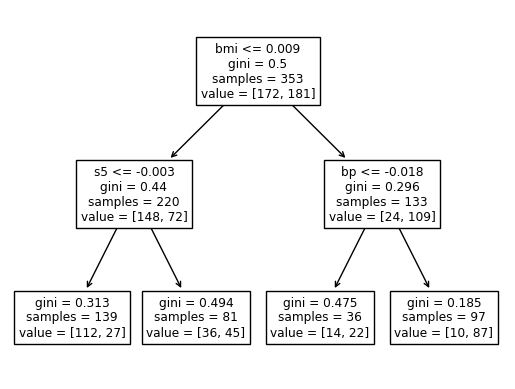

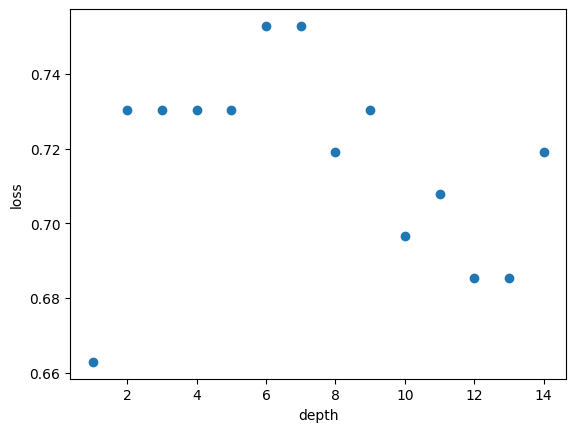

In [ ]:
## Add code here
import sklearn as sklearn
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 2)
classifier.fit(X_train.to_numpy(), y_train)

tree.plot_tree(classifier, feature_names = X_train.columns)

depths = list(range(1,15))

test_accs=[]
for max_d in depths:
  classifier = tree.DecisionTreeClassifier(max_depth = max_d)
  classifier.fit(X_train.to_numpy(), y_train)

  train_acc= classifier.score(X_train.to_numpy(), y_train)
  test_acc=classifier.score(X_test.to_numpy(), y_test)
  test_accs.append(test_acc)
fig, axs = plt.subplots()
axs.scatter(depths, test_accs)
axs.set_xlabel("depth")
axs.set_ylabel("loss")

2.2) the root variable is bmi with thershold value 0.009

The first leaf is reached if you have a bmi above 0.009 and a s5 value above 0.003
The last leaf is reached if you have a bmi below 0.009 and a bp below -0.018

It begins to overfit at around depth 7

## Question 3: Bagging and Boosting (30 points)

**Task 3.1 (15 points)** Implement bagging from scratch by completing the CustomBaggingClassifier Class.

**Task 3.2 (5 points)** Evaluate the performance of the bagged classifier on the test set. Compare its performance with a single decision tree. What is the difference between the performance of the two?

In [ ]:
import numpy as np
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class CustomBaggingClassifier:
    def __init__(self, base_estimator=DecisionTreeClassifier, n_estimators=10, bootstrap_size=None):
        """
        Initialize the CustomBaggingClassifier.

        Parameters:
        base_estimator: The base model to use (default is DecisionTreeClassifier).
        n_estimators: The number of base models in the ensemble.
        bootstrap_size: The number of samples to draw from X to train each base model.
        """
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.bootstrap_size = bootstrap_size
        self.models = []

    def _bootstrap(self, X, y):
        """
        Create a bootstrap sample of the dataset.

        Fill in this method to generate a bootstrap sample.
        """
        # TODO: Implement bootstrapping

        size = self.bootstrap_size if self.bootstrap_size is not None else X.shape[0]
        rows = np.random.randint(0,X.shape[0],size)
        return X[rows], y[rows]

    def fit(self, X, y):
        """
        Fit the bagging ensemble classifier.

        Fill in this method to train n_estimators of the base_estimator on
        different bootstrap samples of the dataset.
        """
        # TODO: Implement the fitting process
        for i in range(self.n_estimators):
          sample = self._bootstrap(X, y)
          self.models.append(self.base_estimator().fit(sample[0],sample[1]))
        return self

    def predict(self, X):
        """
        Make predictions with the bagging ensemble classifier.

        Fill in this method to aggregate predictions from all base models.
        """
        model_preds = np.stack([model.predict(X) for model in self.models])
        cumulative = np.sum(model_preds, axis=0)
        return cumulative > (len(self.models)/2)

    def score(self, X, y):
        """
        Return the accuracy of the bagging ensemble classifier on the provided data and labels.
        """
        predictions = self.predict(X)
        return accuracy_score(y, predictions)


In [ ]:
## Add code to evaluate the bagging classifier on the test set
acc = CustomBaggingClassifier(n_estimators=10).fit(X_train.to_numpy(), y_train).score(X_test.to_numpy(), y_test)
print(acc)

0.6741573033707865


the single decision tree (with max depth of 6) achieves an accuracy  of 0.66, so the bagging classifier has a better accuracy by 0.72

**Task 3.3 (5 points):** Implement AdaBoost and Gradient Boosting with the base estimator as a decision tree with depth = 1. Compare the accuracy between these two models. You can use the pre-built functions from any Python library.  

**Task 3.4 (5 points):** Find the optimal number of models in bagging, AdaBoost and Gradient Boosting and compare the accuracy between these three ensemble variants before and after the grid search.

adaboost loss: 0.6741573033707865
gradboost loss: 0.7191011235955056


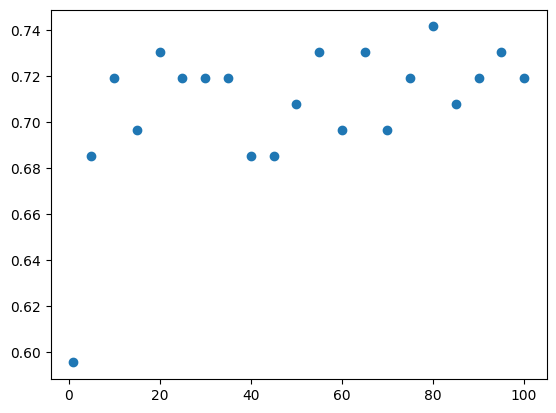

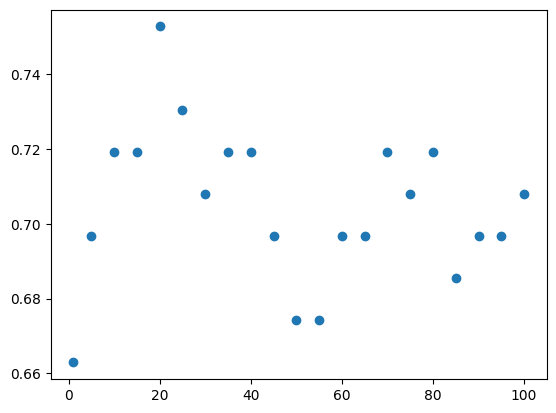

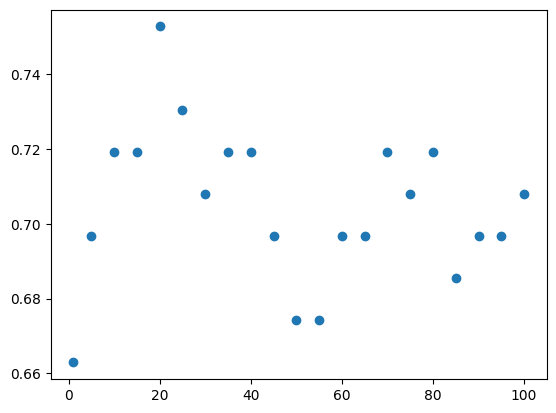

In [ ]:
## Add code here

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


adaboost = AdaBoostClassifier()
adaboost.fit(X_train.to_numpy(),y_train)
print("adaboost loss:",adaboost.score(X_test.to_numpy(), y_test))

gradboost = GradientBoostingClassifier()
gradboost.fit(X_train.to_numpy(),y_train)
print("gradboost loss:",gradboost.score(X_test.to_numpy(), y_test))

bagging_scores = []
adaboost_scores = []
gradboost_scores = []
grid = [1]+ list(range(5,105,5))
for n_models in grid:
  bagging = CustomBaggingClassifier(n_estimators = n_models)
  bagging.fit(X_train.to_numpy(),y_train)
  bagging_scores.append(bagging.score(X_test.to_numpy(), y_test))

  adaboost = AdaBoostClassifier(n_estimators=n_models)
  adaboost.fit(X_train.to_numpy(),y_train)
  adaboost_scores.append(adaboost.score(X_test.to_numpy(), y_test))

  gradboost = GradientBoostingClassifier(n_estimators = n_models)
  gradboost.fit(X_train.to_numpy(),y_train)
  gradboost_scores.append(adaboost.score(X_test.to_numpy(), y_test))
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
ax1.scatter(grid,bagging_scores)
ax2.scatter(grid,adaboost_scores)
ax3.scatter(grid,gradboost_scores)

Before the gridsearch, at n_models = 10 for bagging and n_models=50 for the boosting methods, bagging has a loss of 0.72 while the boosting methods have losses of 0.67 for adaboost and 0.70 for gradboost. The bagging classifier gets its best performance at n_models = 40 of 0.75, while the two boosting methods both get best performance at n_models = 20, both also at 0.75

### Question 4: Random Forest Classifier (18 points)

**Task 4.1 (3 points):** Construct the random forest classifier with a set of hyper-parameters of your choice. Evaluate its performance on the test set. You can use existing python libraries for this question.

**Task 4.2 (5 points):** Compare the accuracy of random forest with the decision tree classifier. Which one obtains better performance and why?

**Task 4.3 (5 points):** Vary the number of trees in the Random Forest to $[10, 50, 100, 200]$. What effect does changing this parameter have on training and test accuracy?

**Task 4.4 (5 points):** Use cross-validation to find an optimal set of hyperparameters for the Random Forest.

0.7528089887640449


[{'n_trees': 10, 'max_depth': 1, 'score': 0.7954545454545454},
 {'n_trees': 10, 'max_depth': 2, 'score': 0.8068181818181818},
 {'n_trees': 10, 'max_depth': 4, 'score': 0.8181818181818182},
 {'n_trees': 10, 'max_depth': 8, 'score': 0.7954545454545454},
 {'n_trees': 10, 'max_depth': 16, 'score': 0.7727272727272727},
 {'n_trees': 10, 'max_depth': 32, 'score': 0.75},
 {'n_trees': 50, 'max_depth': 1, 'score': 0.8636363636363636},
 {'n_trees': 50, 'max_depth': 2, 'score': 0.8068181818181818},
 {'n_trees': 50, 'max_depth': 4, 'score': 0.8181818181818182},
 {'n_trees': 50, 'max_depth': 8, 'score': 0.8522727272727273},
 {'n_trees': 50, 'max_depth': 16, 'score': 0.7954545454545454},
 {'n_trees': 50, 'max_depth': 32, 'score': 0.7954545454545454},
 {'n_trees': 100, 'max_depth': 1, 'score': 0.8068181818181818},
 {'n_trees': 100, 'max_depth': 2, 'score': 0.8181818181818182},
 {'n_trees': 100, 'max_depth': 4, 'score': 0.8295454545454546},
 {'n_trees': 100, 'max_depth': 8, 'score': 0.8068181818181818}

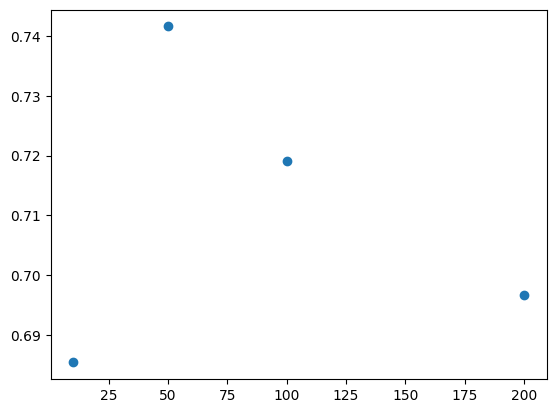

In [ ]:
## Add code here
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 10)
forest.fit(X_train.to_numpy(), y_train)
print(forest.score(X_test.to_numpy(), y_test))


accs = []
tree_vals = [10,50,100,200]
for n_trees in tree_vals:
  forest = RandomForestClassifier(n_estimators=n_trees, max_depth = 10)
  forest.fit(X_train.to_numpy(), y_train)
  accs.append(forest.score(X_test.to_numpy(),y_test))
fig, ax = plt.subplots()
ax.scatter(x=tree_vals, y=accs)




idxs = np.random.permutation(X_train.to_numpy().shape[0])
X_train_perm, y_train_perm = X_train.to_numpy()[idxs], y_train[idxs]
X_val, y_val = X_train[:X_train.shape[0]//4], y_train[:X_train.shape[0]//4]
X_train_noval, y_train_noval = X_train[X_train.shape[0]//4:], y_train[X_train.shape[0]//4:]

scores = []
for n_trees in [10,50,100,200]:
  for max_depth in [1,2,4,8,16,32]:
    forest = RandomForestClassifier(n_estimators=n_trees, max_depth = max_depth)
    forest.fit(X_train_noval, y_train_noval)
    scores.append({"n_trees":n_trees, "max_depth":max_depth,"score":forest.score(X_val, y_val)})

display(scores)




4.2) the random forest performed better, loss of 0.7 compared to 0.67 for the decision tree. This is because the single decision tree overfits to the data more, while since the random forest averages the prediction of multiple trees it is less sensitive to the exact data and thus overfits less
4.4) the max performance is achieved with 50 classifiers and max depth 1

### Question 5: Histogram and Kernel Density Estimation (17 points)

**Task 5.1 (5 points):** For the BMI feature, plot a histogram with the density estimation with 30 equal width bins and answer the following questions:
- What does the height of a bin in the histogram represent?
- How do outliers affect the histogram shape?

**Task 5.2 (5 points):** Now use different number of bins (e.g., 5, 10, 30, 60, 100) and discuss the differences.

**Task 5.3 (5 points):** Implement Kernel Density Estimation with Gaussian kernels for the BMI feature. Compare the results with the histogram density estimation. Plot your learned density function.

**Task 5.4 (2 points):** How might a doctor use KDE to understand the distribution of a particular health metric (like blood glucose levels) across a population?

plot with bins =  5
plot with bins =  10
plot with bins =  30
plot with bins =  60
plot with bins =  100


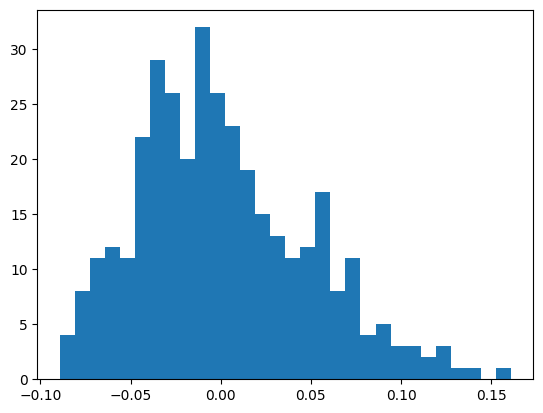

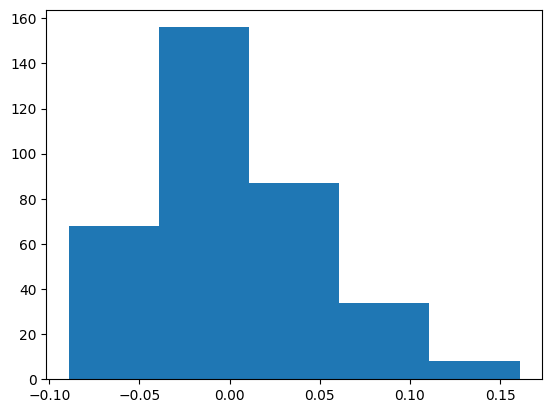

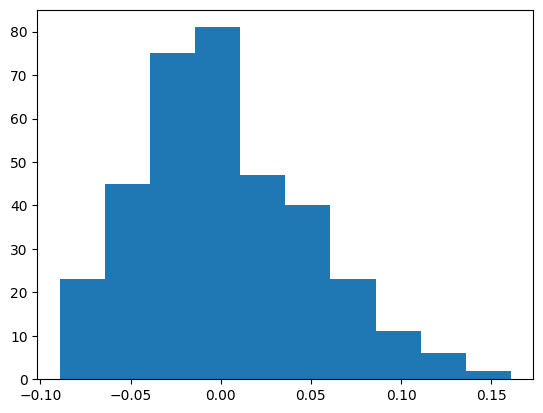

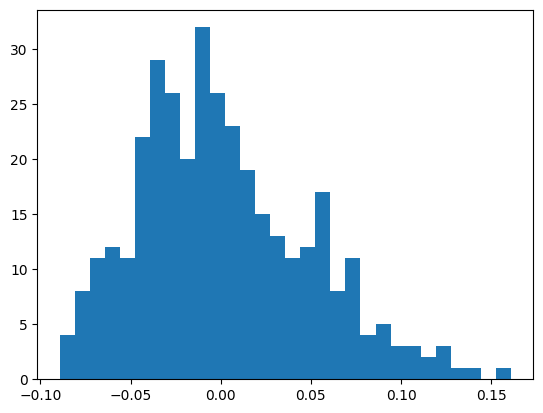

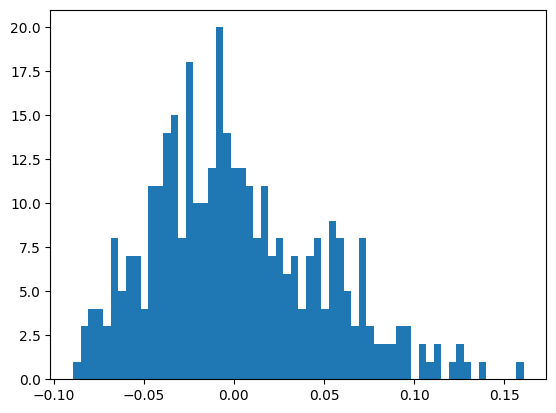

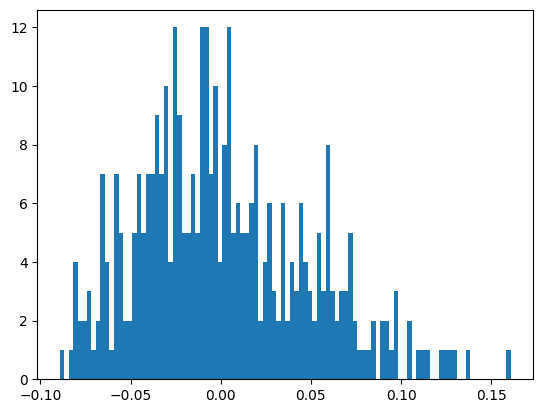

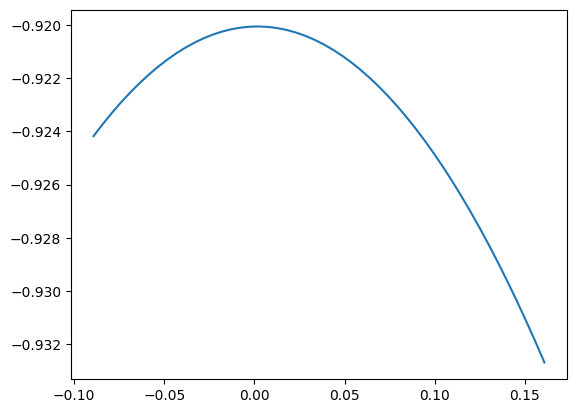

In [ ]:
from sklearn.neighbors import KernelDensity
## Add code here
fig, ax = plt.subplots()
ax.hist(X_train["bmi"],bins=30)
fig.show()
for bins in [5,10,30,60,100]:
  fig, ax = plt.subplots()
  ax.hist(X_train["bmi"],bins=bins)
  fig.show()
  print("plot with bins = ", bins)


fig, ax = plt.subplots()
kde = KernelDensity()
kde.fit(X_train["bmi"].to_numpy().reshape(-1,1))
pts = np.linspace(np.min(X_train["bmi"]), np.max(X_train["bmi"])).reshape(-1,1)
log_dens = kde.score_samples(pts)
ax.plot(pts, log_dens)


5.1) the height indicates the number of samples in the bucket. Outliers will cause the bins to be much bigger due to a higher range
5.2) the more bins, the more we can make out the shape of the distribution but also the more noise there is between buckets
5.4) KDE could be used to visualize the distribution of glucose levels and then detect outliers which are likely indicative of some problem
